In [1]:
import numpy as np
from tslearn.preprocessing import *
from tslearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [3]:
sl = np.loadtxt('cds_only_simu.txt')

In [4]:
rl = np.loadtxt('cds_r_2.txt')[500:900]

In [78]:
len(sl)

560

In [5]:
sl = np.array([i for i in sl for j in range(10)])

In [6]:
sl = TimeSeriesScalerMinMax(min=0, max=10).fit_transform(sl)[0].T[0]
rl = TimeSeriesScalerMinMax(min=0, max=10).fit_transform(rl)[0].T[0]

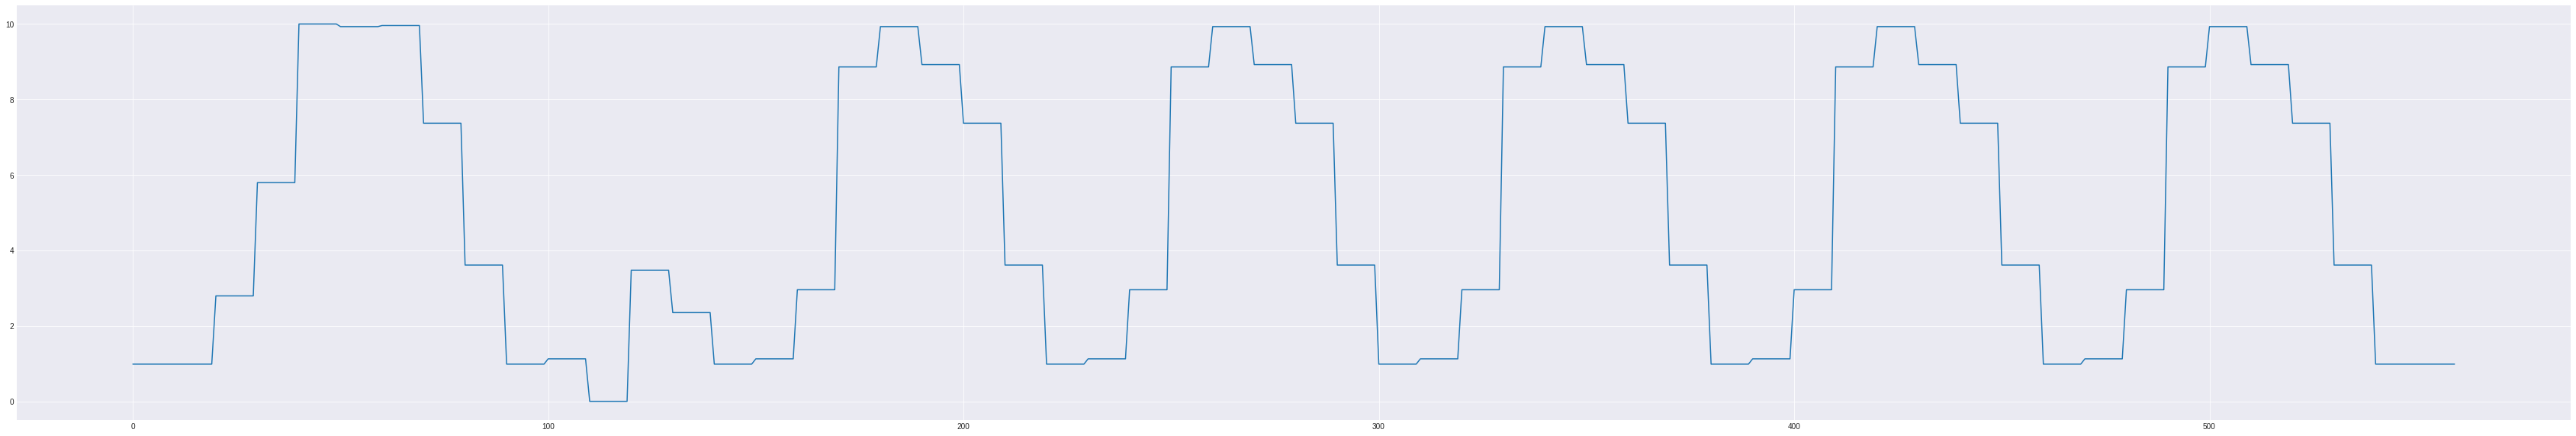

In [28]:
plt.figure(figsize=(60, 10))
plt.plot(sl);

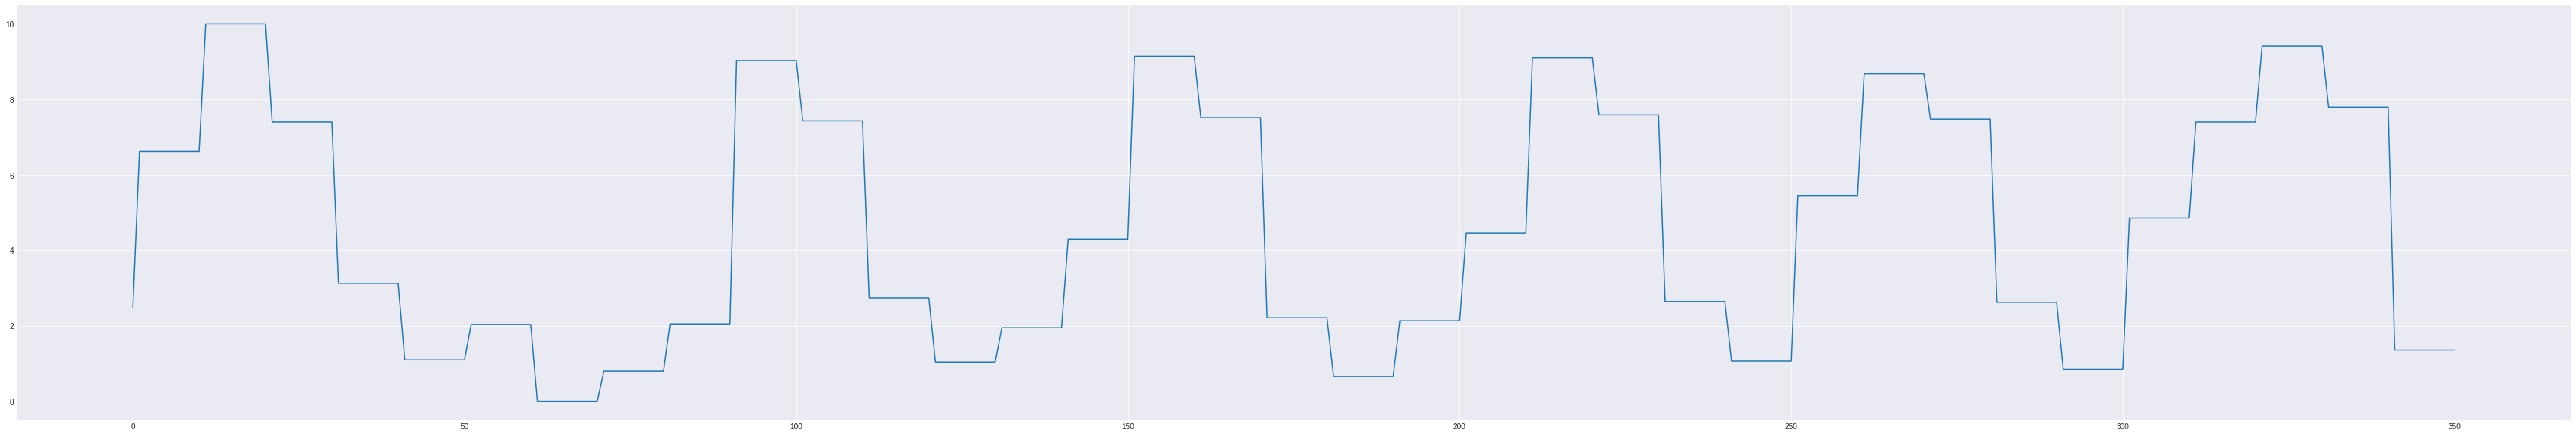

In [27]:
plt.figure(figsize=(60, 10))
plt.plot(rl[9:360]);

In [53]:
sb = metrics.dtw_subsequence_path(sl,rl)

In [54]:
sb[1]

20.75835115289048

In [55]:
sb[0][0]

(0, 9)

In [56]:
sb[0][-1]

(559, 360)

In [7]:
#parameters
s_1 = sl; s_2 = rl
n = 56
sn = 10
mx = 20


##processing

path, sim = metrics.dtw_path(s_1, s_2)

matrix_path = numpy.zeros((len(s_1), len(s_2)), dtype=numpy.int)
for i, j in path:
    matrix_path[i, j] = 1

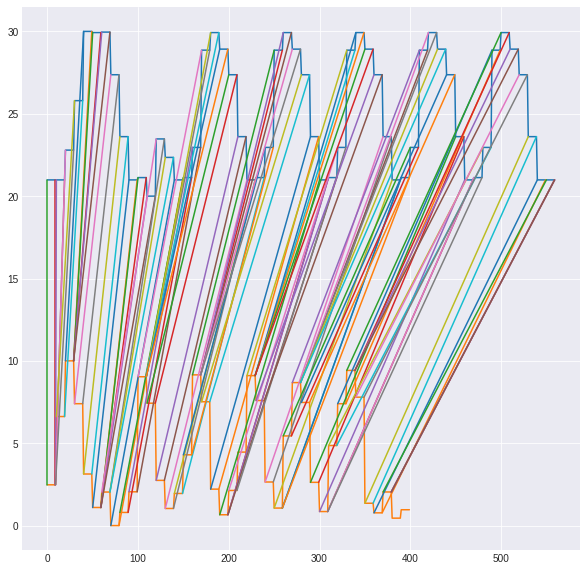

In [93]:
#block 1
plt.figure(figsize=(10, 10))
st = s_1 + mx
plt.plot(st)
plt.plot(s_2)
rag = np.linspace(0,n*sn,n+1)
pos = []
for i in rag:
    if i + 9 < 559:
        pos = pos + [i, i + 9]
    else:
        pos = pos + [i, 559]
for i in pos:
    if i != len(matrix_path):
        #print(i, matrix_path[int(i)].argmax())
        idx = int(matrix_path[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx]])
    else:
        i = i -1
        idx = int(matrix_path[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx]])

In [ ]:
# block 2        
plt.figure(figsize=(10,10))
plt.plot(st)
plt.plot(s_2)
pos = []
for i in s[3]:
    pos = pos + [i*sn, i*sn + sn-1]
for i in pos:
    if i != len(matrix_path):
        #print(i, matrix_path[int(i)].argmax())
        idx = int(matrix_path[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx]])
    else:
        i = i - 1
        idx = int(matrix_path[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx]])

analysed deletions are [1, 2, 5, 6, 10, 11, 13, 18, 19, 26, 27, 31, 34, 35, 39, 42, 43, 47, 51], totally 19
deletion rate is 0.3392857142857143


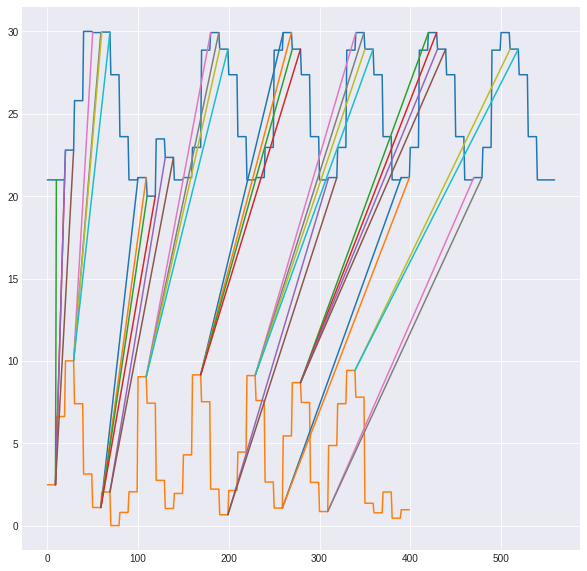

In [11]:
#block 3
deletion = []
for idx, i in enumerate(np.linspace(0,n*sn,n+1)[:n]):
    i = int(i)
    if abs(matrix_path[i+sn-1].argmax() - matrix_path[i].argmax()) < 3:
        deletion = deletion + [idx]
        
plt.figure(figsize=(10, 10))
st = s_1 + mx
plt.plot(st)
plt.plot(s_2)
pos1 = []
for i in deletion:
    if i*sn + 9 > sn*n-1:
        pos1 = pos1 + [i*sn, sn*n-1]
    else:
        pos1 = pos1 + [i*10, i*10 + 9]
for i in pos1:
    if i < len(matrix_path):
        #print(i, matrix_path[int(i)].argmax())
        idx = int(matrix_path[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx]])
    else:
        i = i - 1
        idx = int(matrix_path[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx]])
        
#print('real deletions are     %s'%(s[3]))
print('analysed deletions are %s, totally %s'%(deletion, len(deletion)))
print('deletion rate is %s'%(len(deletion)/n))
#inter = set(s[3]).intersection(set(deletion))
#print('TP are                 %s'%(sorted(list(inter))))

analysed insertions are [2, 21, 38, 39], totally 4
insertion rate is 0.07142857142857142


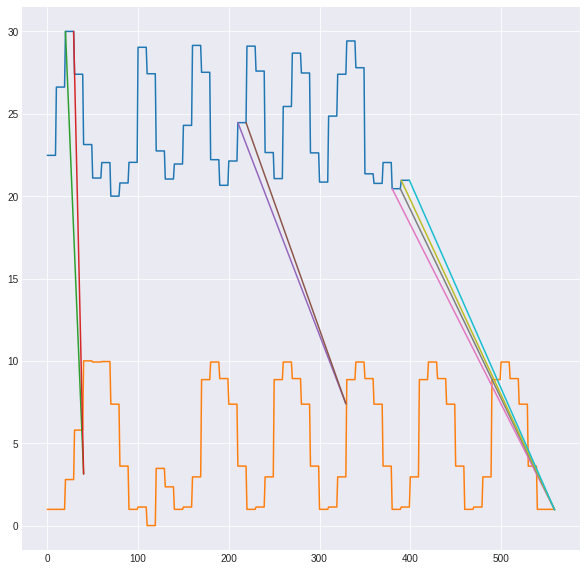

In [26]:
#block 3
insertion = []
matrix_path_t = matrix_path.T
rln = int(len(rl)/10)
lg = len(rl) - 1
for idx, i in enumerate(np.linspace(0, lg ,rln+1)[:rln]):
    i = int(i)
    if abs(matrix_path_t[i+sn-1].argmax() - matrix_path_t[i].argmax()) < 3:
        insertion = insertion + [idx]
        
plt.figure(figsize=(10, 10))
st = s_2 + mx
plt.plot(st)
plt.plot(s_1)
pos1 = []
for i in insertion:
    if i*sn + 9 > lg:
        pos1 = pos1 + [lg, lg + 1]
    else:
        pos1 = pos1 + [i*10, i*10 + 9]
for i in pos1:
    if i < len(matrix_path_t):
        #print(i, matrix_path_t[int(i)].argmax())
        idx = int(matrix_path_t[int(i)].argmax())
        if idx > len(matrix_path_t):
            plt.plot([i, idx], [st[int(i)],s_2[len(matrix_path_t)-1]])
        else:
            plt.plot([i, idx], [st[int(i)],s_2[idx]])
    else:
        i = i - 1
        idx = int(matrix_path_t[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx]])
        
#print('real insertions are     %s'%(s[3]))
print('analysed insertions are %s, totally %s'%(insertion, len(insertion)))
print('insertion rate is %s'%(len(insertion)/n))
#inter = set(s[3]).intersection(set(insertion))
#print('TP are                 %s'%(sorted(list(inter))))

In [24]:
insertion

[2, 21, 38, 39]

In [16]:
np.linspace(0,int(len(sl)),rln+1)[:rln]

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
       330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
       440., 450., 460., 470., 480., 490., 500., 510., 520., 530., 540.,
       550.])